# Cats and Dogs Kaggle notebook

## Import the required libraries

In [1]:
%matplotlib inline
import utils; reload(utils)
from utils import *

Using Theano backend.


In [48]:
#The path of our working directory
path = '/home/gopi34/Documents/MACHINE LEARNING/fast_ai/week1/dogscats/lesson2/'

In [49]:
#Batch size for training and testing the data
batch_size = 64

## Creating directories and preparing files for training and testing
### NOTE : Do this only once, because it doesn't make sense to create a dir which is already created,moreover we may have duplicate files.

In [50]:
#list the directories
#%ls -ln

In [51]:
#move to train dir
#%cd train/

In [52]:
#count all files in train dir
#%ls | wc -l

In [53]:
#create a dir named valid/ for validation data
#%mkdir ../valid

In [ ]:
#move random 2000 images to validation directory for validation
#g = glob('*.jpg')
#shuf = np.random.permutation(g)
#for i in range(2000): os.rename(shuf[i], '../valid/' + shuf[i])

In [54]:
#create appropriate dog and cats dir and move appropriate files into their folders
#%mkdir ../valid/cats
#%mkdir ../valid/dogs
#% mv -v ../valid/cat.* ../valid/cats/
#% mv -v ../valid/dog.* ../valid/dogs/

In [55]:
#create sample data folder for sample and move appropriate files into their folders
#%mkdir ../sample
#%mkdir ../sample/train
#%mkdir ../sample/valid

In [56]:
#library for copyfile
#from shutil import copyfile

In [ ]:
#copy files to sample train directory
#g = glob('*.jpg')
#shuf = np.random.permutation(g)
#for i in range(200): copyfile(shuf[i], '../sample/train/' + shuf[i])

#move files to appropriate cats and dogs directory

#%mkdir ../train/cats
#%mkdir ../train/dogs
#% mv -v ../train/cat.* ../train/cats/
#% mv -v ../train/dog.* ../train/dogs/

In [57]:
#go back to train dir
#%cd ../lesson2/train/

In [58]:
#copy files to sample train directory
#g = glob('*.jpg')
#shuf = np.random.permutation(g)
#for i in range(50): copyfile(shuf[i], '../sample/valid/' + shuf[i])

#move files to appropriate cats and dogs directory

#%mkdir ../valid/cats
#%mkdir ../valid/dogs
#% mv -v ../valid/cat.* ../valid/cats/
#% mv -v ../valid/dog.* ../valid/dogs/

## We use Imagenet VGG16 model and finetune for DogsandCats classification

In [59]:
#Import the model
from vgg16 import Vgg16

In [5]:
#Create model object, get batches for training and validation
#Finetune the model, what finetune does is. It removes the last dense layer which has 1000 classes 
#for Imagenet and replaces with 2 classes for our dogsandcats
vgg = Vgg16()
batches = vgg.get_batches(path+'train/', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid/', batch_size=batch_size*2)
vgg.finetune(batches)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [60]:
#Initially I tried using the trained model but their seems to be some glich and it didn't work

In [ ]:
#vgg.model.load_weights('/home/gopi34/Documents/MACHINE LEARNING/fast_ai/week1/dogscats/results/ft2.h5')

## Fit the model as we have seperated batches for training and validation.

In [6]:
#Setting no of epochs to 1
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 12333s - loss: 0.1239 - acc: 0.9676 - val_loss: 0.0730 - val_acc: 0.9810


In [22]:
#Saving the trained model weight so that I can re-run the training with different hyper-parameter setting
vgg.model.save_weights(path+'results/ft1.h5')

## Predicting using the trained model with our own Test data from DogsandCats

In [7]:
#batches is the no of images to be loaded for prediction
#where pred is the predicted value from our model for each batch
batches, pred = vgg.test(path+'test', batch_size= batch_size*2)

Found 12500 images belonging to 1 classes.


In [62]:
#saving the test names of each instance to a variable filenames
filenames = batches.filenames

## Saving the predicted values to np.array

In [11]:
save_array(path+'results/test_preds.dat', pred)
save_array(path+'results/filenames.dat', filenames)

In [63]:
#the first five values of prediction
pred[:5]

array([[  3.2373e-08,   1.0000e+00],
       [  1.0000e+00,   2.2435e-11],
       [  1.0000e+00,   1.6717e-06],
       [  9.6675e-12,   1.0000e+00],
       [  4.0005e-07,   1.0000e+00]], dtype=float32)

In [64]:
#first five file names
filenames[:5]

['onedeep/1.jpg',
 'onedeep/10.jpg',
 'onedeep/100.jpg',
 'onedeep/1000.jpg',
 'onedeep/10000.jpg']

In [65]:
#Load the array as want to clip and do analysis with it
pred = load_array('results/test_preds.dat/')
filenames = load_array('results/filenames.dat/')

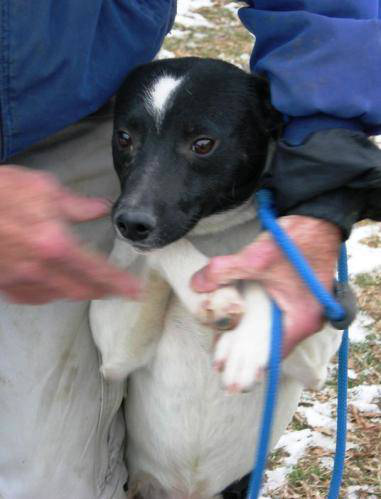

In [66]:
#Plot for first instance in our test set
from PIL import Image
Image.open('test/'+filenames[0])

In [35]:
#first five instance of prediction from our model
is_dog = pred[:,1]
is_dog[:5]

array([  1.0000e+00,   2.2435e-11,   1.6717e-06,   1.0000e+00,   1.0000e+00], dtype=float32)

In [67]:
#Clipping the results
is_dog = np.clip(pred[:,1], 0.02, 0.98)

In [43]:
#values after clipping
is_dog[:10]

array([ 0.98,  0.02,  0.02,  0.98,  0.98,  0.02,  0.02,  0.98,  0.98,  0.02], dtype=float32)

In [68]:
#stripping the file name so that we can merge two np.array id,classes
ids = [int(f[8:f.find('.')]) for f in filenames]
ids[:5]

[1, 10, 100, 1000, 10000]

In [69]:
#merging two arrays
subm = np.stack([ids, is_dog], axis=1)
subm[:5]

array([[  1.0000e+00,   9.8000e-01],
       [  1.0000e+01,   2.0000e-02],
       [  1.0000e+02,   2.0000e-02],
       [  1.0000e+03,   9.8000e-01],
       [  1.0000e+04,   9.8000e-01]])

## Saving the array to a file, so that we can make a submission

In [70]:
#save using np.savetxt
np.savetxt('/home/gopi34/Documents/MACHINE LEARNING/fast_ai/week1/dogscats/lesson2/subm98.csv', subm, \
           fmt='%d, %.5f', header='id,label', comments='')

In [71]:
#handy tool to view the saved file
from IPython.display import FileLink
FileLink('/home/gopi34/Documents/MACHINE LEARNING/fast_ai/week1/dogscats/lesson2/subm98.csv')

/home/gopi34/Documents/MACHINE LEARNING/fast_ai/week1/dogscats/lesson2/subm98.csv

##  So with this approach of finetuning the pretrained model gives us a decent 98% accuracy, in the coming days we try to finetune the model to attain higher accuracy.